<a href="https://colab.research.google.com/github/amoghghadge/DS4002-Project3/blob/main/project_3_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

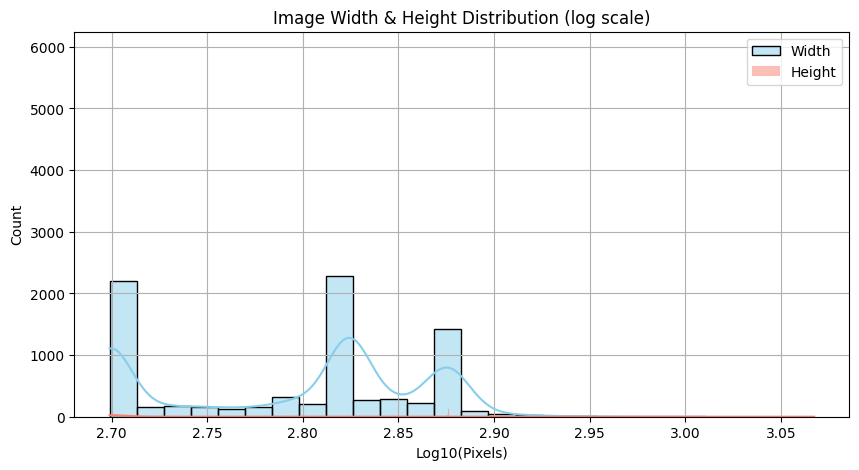

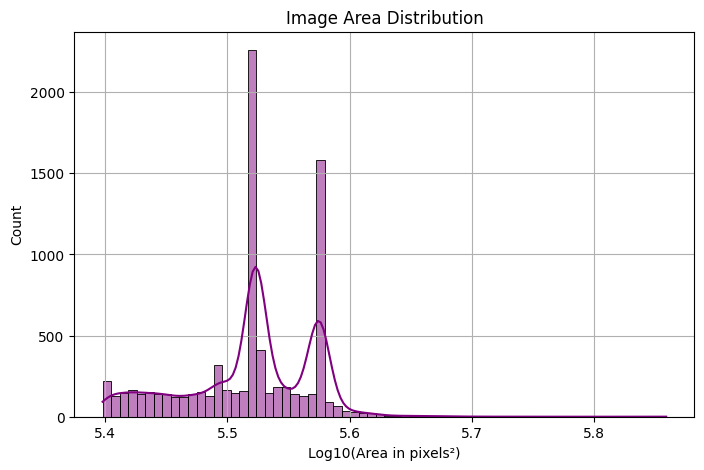

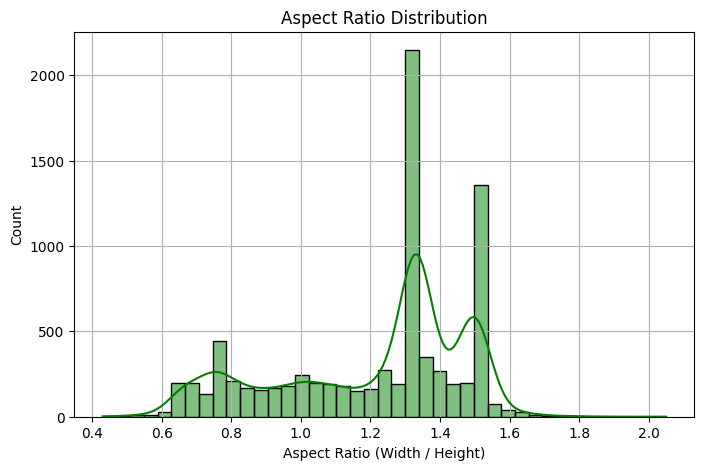

<ipython-input-13-167112004b2c>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="label", data=df, palette="viridis")


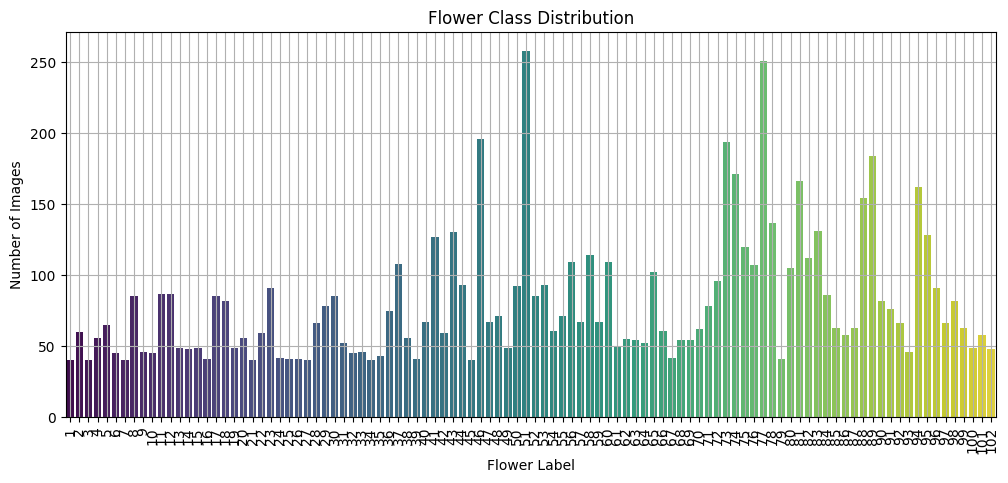

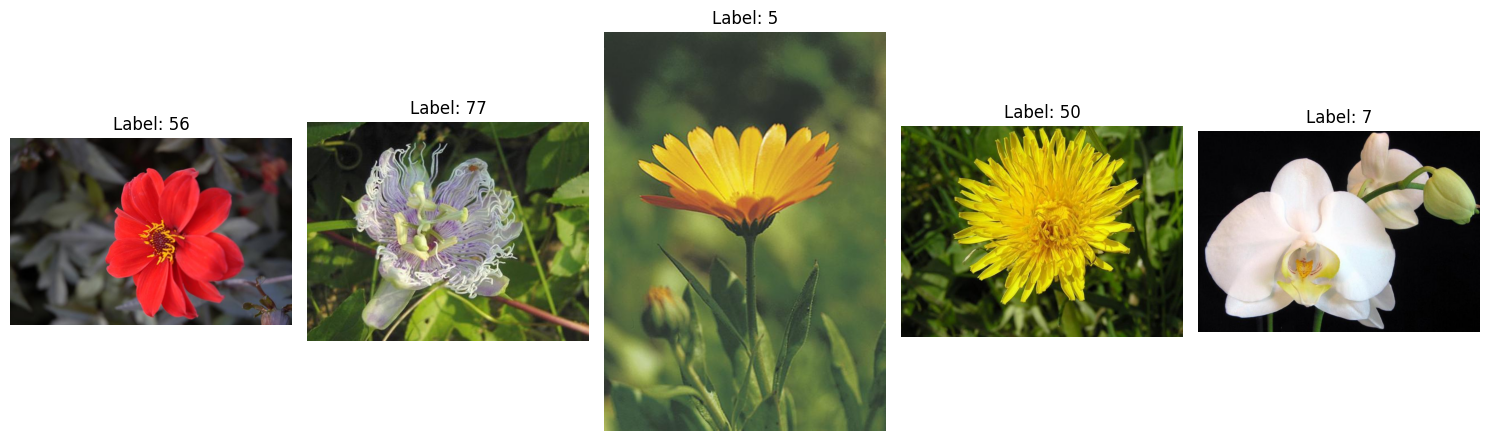

In [13]:
import os
import tarfile
from PIL import Image, UnidentifiedImageError
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import tempfile
import shutil

#1 extract TGZ file
tgz_path = "/content/102flowers.tgz"
temp_dir = tempfile.mkdtemp()

with tarfile.open(tgz_path, "r:gz") as tar:
    tar.extractall(path=temp_dir)

#2 locate the image folder
jpg_folder = os.path.join(temp_dir, "jpg")

#3 load label numbers
labels_csv_path = "/content/flowerimagelabels.csv"
labels_df = pd.read_csv(labels_csv_path)

#4 collect image info
image_data = []
image_files = sorted(os.listdir(jpg_folder))

for i, file in enumerate(image_files):
    file_path = os.path.join(jpg_folder, file)
    try:
        with Image.open(file_path) as img:
            image_data.append({
                "file": file,
                "width": img.width,
                "height": img.height,
                "area": img.width * img.height,
                "aspect_ratio": round(img.width / img.height, 2),
                "label": labels_df["label"].iloc[i]
            })
    except (UnidentifiedImageError, OSError):
        pass

df = pd.DataFrame(image_data)

#5 visualizations

#image width & height plot
plt.figure(figsize=(10, 5))
sns.histplot(np.log10(df["width"]), color="skyblue", label="Width", kde=True)
sns.histplot(np.log10(df["height"]), color="salmon", label="Height", kde=True)
plt.xlabel("Log10(Pixels)")
plt.ylabel("Count")
plt.title("Image Width & Height Distribution (log scale)")
plt.legend()
plt.grid(True)
plt.show()

#image area plot
plt.figure(figsize=(8, 5))
sns.histplot(np.log10(df["area"]), color="purple", kde=True)
plt.xlabel("Log10(Area in pixels²)")
plt.title("Image Area Distribution")
plt.grid(True)
plt.show()

#aspect Ratio
plt.figure(figsize=(8, 5))
sns.histplot(df["aspect_ratio"], color="green", kde=True)
plt.xlabel("Aspect Ratio (Width / Height)")
plt.title("Aspect Ratio Distribution")
plt.grid(True)
plt.show()

#flower class label Distribution
plt.figure(figsize=(12, 5))
sns.countplot(x="label", data=df, palette="viridis")
plt.title("Flower Class Distribution")
plt.xlabel("Flower Label")
plt.ylabel("Number of Images")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

#5 random sample images
def show_samples(df, folder, n=5):
    samples = df.sample(n)
    plt.figure(figsize=(15, 5))
    for i, row in enumerate(samples.itertuples()):
        img = Image.open(os.path.join(folder, row.file))
        plt.subplot(1, n, i + 1)
        plt.imshow(img)
        plt.title(f"Label: {row.label}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

show_samples(df, jpg_folder)
